In [ ]:
#import librabries
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def changecolumn(dataset, AttackType):
  df = pd.read_csv(dataset).sample(frac =0.1, random_state=20,replace= False)
  df.columns= ["Timestamp", "CAN ID", "Byte", "DATA[0]", "DATA[1]", "DATA[2]","DATA[3]","DATA[4]","DATA[5]","DATA[6]","DATA[7]","AttackType"]
  df['AttackType'] = np.where(df['AttackType'] == 'T', AttackType, 'Normal Message')
  df.dropna()
  return df

dfDos = changecolumn('DoS_dataset.csv', 'DoS Attack')
dfFuzzy = changecolumn('Fuzzy_dataset.csv', 'Fuzzy Attack')
dfGear = changecolumn('gear_dataset.csv','Gear Spooing Attack')
dfRPM = changecolumn('RPM_dataset.csv', 'RPM Spoofing Attack')
frames = [dfDos, dfFuzzy, dfGear, dfRPM]
df = pd.concat(frames)
print(df.head(10))
print(df.shape)

            Timestamp CAN ID  Byte DATA[0] DATA[1] DATA[2] DATA[3] DATA[4]  \
2047758  1.478200e+09   0000     8      00      00      00      00      00   
3419755  1.478201e+09   0131     8      1b      80      00      00      3f   
1031333  1.478199e+09   00a1     8      80      89      00      00      24   
1912192  1.478200e+09   0260     8      18      21      22      30      08   
3582552  1.478201e+09   02c0     8      14      00      00      00      00   
1668778  1.478200e+09   0130     8      0b      80      00      ff      08   
1888582  1.478200e+09   0370     8      00      20      00      00      00   
1123941  1.478199e+09   04f0     8      00      00      00      80      00   
490692   1.478199e+09   0130     8      05      80      00      ff      0b   
95948    1.478198e+09   0131     8      f7      7f      00      00      4c   

        DATA[5] DATA[6] DATA[7]      AttackType  
2047758      00      00      00      DoS Attack  
3419755      7f      0e      a6  Normal M

In [ ]:
df.isnull().sum()

Timestamp         0
CAN ID            0
Byte              0
DATA[0]           0
DATA[1]           0
DATA[2]           0
DATA[3]       14695
DATA[4]       14695
DATA[5]       14695
DATA[6]       20092
DATA[7]       20092
AttackType        0
dtype: int64

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
df.isnull().sum()

Timestamp     0
CAN ID        0
Byte          0
DATA[0]       0
DATA[1]       0
DATA[2]       0
DATA[3]       0
DATA[4]       0
DATA[5]       0
DATA[6]       0
DATA[7]       0
AttackType    0
dtype: int64

In [ ]:
cols = ['CAN ID','DATA[0]', 'DATA[1]', 'DATA[2]', 'DATA[3]', 'DATA[4]','DATA[5]','DATA[6]','DATA[7]']  # list of columns to convert
df[cols] = df[cols].applymap(int, base=16)           # do conversion

In [ ]:
df

,Timestamp,CAN ID,Byte,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],AttackType
0,1.478200e+09,0,8,0,0,0,0,0,0,0,0,DoS Attack
1,1.478201e+09,305,8,27,128,0,0,63,127,14,166,Normal Message
2,1.478199e+09,161,8,128,137,0,0,36,0,0,0,Normal Message
3,1.478200e+09,608,8,24,33,34,48,8,143,112,5,Normal Message
4,1.478201e+09,704,8,20,0,0,0,0,0,0,0,Normal Message
...,...,...,...,...,...,...,...,...,...,...,...,...
1636850,1.478191e+09,809,8,220,183,126,20,17,32,0,20,Normal Message
1636851,1.478192e+09,305,8,242,127,0,0,58,127,12,131,Normal Message
1636852,1.478201e+09,305,8,242,127,0,0,64,127,6,22,Normal Message
1636853,1.478193e+09,704,8,21,0,0,0,0,0,0,0,Normal Message


In [ ]:
#drop columns
df.drop(['Timestamp'], axis = 1, inplace = True)

In [ ]:
df = df.iloc[0:818440]
df.shape

(818440, 11)

In [ ]:
df.dtypes

CAN ID         int64
Byte           int64
DATA[0]        int64
DATA[1]        int64
DATA[2]        int64
DATA[3]        int64
DATA[4]        int64
DATA[5]        int64
DATA[6]        int64
DATA[7]        int64
AttackType    object
dtype: object

In [ ]:
df.AttackType.value_counts()

Normal Message         699801
DoS Attack              58469
Fuzzy Attack            49258
Gear Spooing Attack     10912
Name: AttackType, dtype: int64

In [ ]:
numeric_features = df.dtypes[df.dtypes != 'object'].index
scaler = QuantileTransformer()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
df[numeric_features]= df[numeric_features].apply(lambda x: (x*255))

In [ ]:
df.describe()

,CAN ID,Byte,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7]
count,818440.000000,818440.0,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000,818440.000000
mean,126.709272,0.0,111.052351,105.188857,85.656100,103.388715,102.250758,111.314187,89.079135,92.923990
std,74.264902,0.0,91.828226,95.138994,101.082220,101.275593,97.716213,91.913570,100.680651,100.380912
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.217718,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,133.370871,0.0,126.351351,120.990991,0.000000,120.352853,129.414414,131.328829,0.000000,0.000000
75%,192.207207,0.0,190.675676,190.037538,197.312312,194.121622,192.602071,185.315315,190.675676,192.590090
max,255.000000,0.0,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
df0 = df[df['AttackType']=='Normal Message'].drop(['AttackType'], axis=1)
df1= df[df['AttackType']=='DoS Attack'].drop(['AttackType'],axis=1)
df2= df[df['AttackType']=='Fuzzy Attack'].drop(['AttackType'], axis=1)
df3= df[df['AttackType']=='Gear Spooing Attack'].drop(['AttackType'], axis=1)

In [ ]:
count=0
ims = []

image_path = "train/0/"
os.makedirs(image_path, exist_ok=True)

for i in range(0, len(df0)):
  count=count+1
  if count<=27:
    im=df0.iloc[i].values
    ims=np.append(ims,im)
  else:
    ims=np.array(ims).reshape(9,10,3)
    array = np.array(ims, dtype=np.uint8)
    new_image = Image.fromarray(array)
    new_image.save(image_path+str(i)+'.png')
    count=0
    ims=[]

In [ ]:
count=0
ims = []

image_path = "train/1/"
os.makedirs(image_path, exist_ok=True)

for i in range(0, len(df1)):
  count=count+1
  if count<=27:
    im=df1.iloc[i].values
    ims=np.append(ims,im)
  else:
    ims=np.array(ims).reshape(9,10,3)
    array = np.array(ims, dtype=np.uint8)
    new_image = Image.fromarray(array)
    new_image.save(image_path+str(i)+'.png')
    count=0
    ims=[]

In [ ]:
count=0
ims = []

image_path = "train/2/"
os.makedirs(image_path, exist_ok=True)

for i in range(0, len(df2)):
  count=count+1
  if count<=27:
    im=df2.iloc[i].values
    ims=np.append(ims,im)
  else:
    ims=np.array(ims).reshape(9,10,3)
    array = np.array(ims, dtype=np.uint8)
    new_image = Image.fromarray(array)
    new_image.save(image_path+str(i)+'.png')
    count=0
    ims=[]

In [ ]:
count=0
ims = []

image_path = "train/3/"
os.makedirs(image_path, exist_ok=True)

for i in range(0, len(df3)):
  count=count+1
  if count<=27:
    im=df2.iloc[i].values
    ims=np.append(ims,im)
  else:
    ims=np.array(ims).reshape(9,10,3)
    array = np.array(ims, dtype=np.uint8)
    new_image = Image.fromarray(array)
    new_image.save(image_path+str(i)+'.png')
    count=0
    ims=[]

In [ ]:
Train_Dir='./train/'
Val_Dir='./test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
  for filename in os.listdir(os.path.join(Train_Dir,subdir)):
    filepath=os.path.join(Train_Dir,subdir,filename)
    allimgs.append(filepath)
print(len(allimgs))

29228


In [ ]:
Numbers=len(allimgs)//5

def mymovefile(srcfile,dstfile):
  if not os.path.isfile(srcfile):
    print("%s not exist!"%(srcfile))
  else:
    fpath,fname=os.path.split(dstfile)
    if not os.path.exists(fpath):
      os.makedirs(fpath)
    shutil.move(srcfile,dstfile)

In [ ]:
Numbers

5845

In [ ]:
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
  dest_path=img.replace(Train_Dir,Val_Dir)
  mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [ ]:
def get_224(folder,dstdir):
  imgfilepaths=[]
  for root, dirs, imgs in os.walk(folder):
    for thisimg in imgs:
      thisimg_path=os.path.join(root,thisimg)
      imgfilepaths.append(thisimg_path)
  for thisimg_path in imgfilepaths:
    dir_name, filename=os.path.split(thisimg_path)
    dir_name=dir_name.replace(folder,dstdir)
    new_file_path=os.path.join(dir_name,filename)
    if not os.path.exists(dir_name):
      os.makedirs(dir_name)
    img=cv2.imread(thisimg_path)
    img=cv2.resize(img,(224,224))
    cv2.imwrite(new_file_path,img)
  print('Finish resizing'.format(folder=folder))

In [ ]:
DATA_DIR_224='./train_224/'
get_224(folder='./train/', dstdir=DATA_DIR_224)

Finish resizing


In [ ]:
DATA_DIR2_224='./test_224/'
get_224(folder='./test/',dstdir=DATA_DIR2_224)

Finish resizing


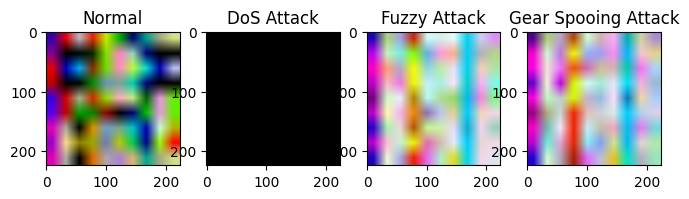

In [ ]:
img1 = Image.open('./train_224/0/27.png')
img2 = Image.open('./train_224/1/27.png')
img3 = Image.open('./train_224/2/10023.png')
img4 = Image.open('./train_224/3/1007.png')

plt.figure(figsize=(10,10))
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("DoS Attack")
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("Fuzzy Attack")
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("Gear Spooing Attack")
plt.show()

In [ ]:
img = cv2.imread('./train_224/0/27.png')
img.shape

(224, 224, 3)

In [ ]:
import os
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.optimizers.legacy import Adam
from keras.models import Model,load_model,Sequential
from keras.applications.xception import  Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.mobilenet import MobileNet
import keras.callbacks as kcallbacks
import keras
from tensorflow.keras.utils import load_img, img_to_array
#from keras.preprocessing.image import img_to_array
import math
import random
from keras.utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
TARGET_SIZE = (224,224)
INPUT_SIZE= (224,224,3)
BATCHSIZE = 128

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './train_224/',
    target_size=TARGET_SIZE,
    batch_size=BATCHSIZE,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
    './test_224/',
    target_size=TARGET_SIZE,
    batch_size=BATCHSIZE,
    class_mode='categorical'
)

Found 23383 images belonging to 4 classes.
Found 5845 images belonging to 4 classes.


In [ ]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [ ]:
history_this= LossHistory()

In [ ]:
def cnn_by_own(input_shape,num_class,epochs,savepath='./model_own.h5'):
    model = Sequential()
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=input_shape,padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(num_class,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #train model
    earlyStopping=kcallbacks.EarlyStopping(monitor='val_acc', patience=2, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
    hist=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[earlyStopping,saveBestModel,history_this],
    )

Epoch 1/20
  6/183 [..............................] - ETA: 3:46 - loss: 0.8919 - accuracy: 0.7201

183/183 [==============================] - ETA: 0s - loss: 0.1138 - accuracy: 0.9567

183/183 [==============================] - 349s 2s/step - loss: 0.1138 - accuracy: 0.9567 - val_loss: 0.0429 - val_accuracy: 0.9853
Epoch 2/20
183/183 [==============================] - ETA: 0s - loss: 0.0536 - accuracy: 0.9817

183/183 [==============================] - 269s 1s/step - loss: 0.0536 - accuracy: 0.9817 - val_loss: 0.0429 - val_accuracy: 0.9848
Epoch 3/20
183/183 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9843

183/183 [==============================] - 263s 1s/step - loss: 0.0433 - accuracy: 0.9843 - val_loss: 0.0375 - val_accuracy: 0.9855
Epoch 4/20
183/183 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9852

183/183 [==============================] - 265s 1s/step - loss: 0.0390 - accuracy: 0.9852 - val_loss: 0.0380 - val_accuracy: 0.9855
Epoch 5/20
183/183 [==============================] - ETA: 0s - loss: 0.0502 - accuracy: 0.9849

183/183 [==============================] - 264s 1s/step - loss: 0.0502 - accuracy: 0.9849 - val_loss: 0.0377 - val_accuracy: 0.9853
Epoch 6/20
183/183 [==============================] - ETA: 0s - loss: 0.0383 - accuracy: 0.9854

183/183 [==============================] - 262s 1s/step - loss: 0.0383 - accuracy: 0.9854 - val_loss: 0.0373 - val_accuracy: 0.9853
Epoch 7/20
183/183 [==============================] - ETA: 0s - loss: 0.0381 - accuracy: 0.9853

183/183 [==============================] - 264s 1s/step - loss: 0.0381 - accuracy: 0.9853 - val_loss: 0.0393 - val_accuracy: 0.9853
Epoch 8/20
183/183 [==============================] - ETA: 0s - loss: 0.0381 - accuracy: 0.9854

183/183 [==============================] - 262s 1s/step - loss: 0.0381 - accuracy: 0.9854 - val_loss: 0.0379 - val_accuracy: 0.9853
Epoch 9/20
183/183 [==============================] - ETA: 0s - loss: 0.0386 - accuracy: 0.9852

183/183 [==============================] - 263s 1s/step - loss: 0.0386 - accuracy: 0.9852 - val_loss: 0.0381 - val_accuracy: 0.9853
Epoch 10/20
183/183 [==============================] - ETA: 0s - loss: 0.0393 - accuracy: 0.9852

183/183 [==============================] - 262s 1s/step - loss: 0.0393 - accuracy: 0.9852 - val_loss: 0.0373 - val_accuracy: 0.9855
Epoch 11/20
183/183 [==============================] - ETA: 0s - loss: 0.0375 - accuracy: 0.9853

183/183 [==============================] - 264s 1s/step - loss: 0.0375 - accuracy: 0.9853 - val_loss: 0.0372 - val_accuracy: 0.9855
Epoch 12/20
183/183 [==============================] - ETA: 0s - loss: 0.0377 - accuracy: 0.9854

183/183 [==============================] - 263s 1s/step - loss: 0.0377 - accuracy: 0.9854 - val_loss: 0.0386 - val_accuracy: 0.9855
Epoch 13/20
183/183 [==============================] - ETA: 0s - loss: 0.0378 - accuracy: 0.9853

183/183 [==============================] - 262s 1s/step - loss: 0.0378 - accuracy: 0.9853 - val_loss: 0.0383 - val_accuracy: 0.9853
Epoch 14/20
183/183 [==============================] - ETA: 0s - loss: 0.0381 - accuracy: 0.9854

183/183 [==============================] - 262s 1s/step - loss: 0.0381 - accuracy: 0.9854 - val_loss: 0.0372 - val_accuracy: 0.9855
Epoch 15/20
183/183 [==============================] - ETA: 0s - loss: 0.0377 - accuracy: 0.9854

183/183 [==============================] - 261s 1s/step - loss: 0.0377 - accuracy: 0.9854 - val_loss: 0.0375 - val_accuracy: 0.9855
Epoch 16/20
183/183 [==============================] - ETA: 0s - loss: 0.0375 - accuracy: 0.9854

183/183 [==============================] - 262s 1s/step - loss: 0.0375 - accuracy: 0.9854 - val_loss: 0.0373 - val_accuracy: 0.9855
Epoch 17/20
183/183 [==============================] - ETA: 0s - loss: 0.0391 - accuracy: 0.9850

183/183 [==============================] - 262s 1s/step - loss: 0.0391 - accuracy: 0.9850 - val_loss: 0.0371 - val_accuracy: 0.9855
Epoch 18/20
183/183 [==============================] - ETA: 0s - loss: 0.0374 - accuracy: 0.9854

183/183 [==============================] - 263s 1s/step - loss: 0.0374 - accuracy: 0.9854 - val_loss: 0.0371 - val_accuracy: 0.9855
Epoch 19/20
183/183 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9854

183/183 [==============================] - 262s 1s/step - loss: 0.0373 - accuracy: 0.9854 - val_loss: 0.0371 - val_accuracy: 0.9855
Epoch 20/20
183/183 [==============================] - ETA: 0s - loss: 0.0371 - accuracy: 0.9854

183/183 [==============================] - 262s 1s/step - loss: 0.0371 - accuracy: 0.9854 - val_loss: 0.0373 - val_accuracy: 0.9855


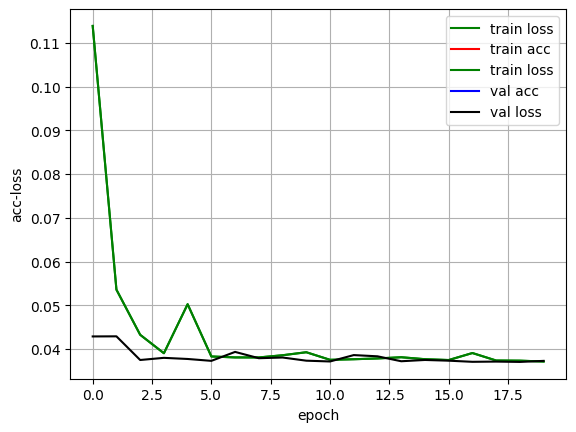

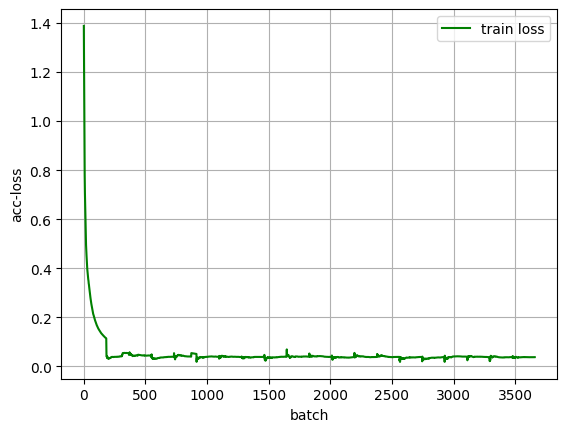

In [ ]:
cnn_by_own(input_shape=INPUT_SIZE,num_class=4,epochs=20)
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

In [ ]:
def xception( num_class, epochs,savepath='./xception.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = Xception(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:131]:		#could be tuned to be 50, 100, or 131
        layer.trainable = False
    for layer in model_fine_tune.layers[131:]:
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='xception')
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_acc', patience=3, verbose=1, mode='auto')	#patience could be tuned by 2 and 3
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='val_acc',
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        callbacks=[earlyStopping, saveBestModel, history],
    )

83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/20
183/183 [==============================] - ETA: 0s - loss: 0.0687 - accuracy: 0.9774

183/183 [==============================] - 142s 718ms/step - loss: 0.0687 - accuracy: 0.9774 - val_loss: 0.0356 - val_accuracy: 0.9867
Epoch 2/20
183/183 [==============================] - ETA: 0s - loss: 0.0372 - accuracy: 0.9864

183/183 [==============================] - 145s 793ms/step - loss: 0.0372 - accuracy: 0.9864 - val_loss: 0.0378 - val_accuracy: 0.9867
Epoch 3/20
183/183 [==============================] - ETA: 0s - loss: 0.0367 - accuracy: 0.9867

183/183 [==============================] - 132s 719ms/step - loss: 0.0367 - accuracy: 0.9867 - val_loss: 0.0350 - val_accuracy: 0.9868
Epoch 4/20
183/183 [==============================] - ETA: 0s - loss: 0.0366 - accuracy: 0.9866

183/183 [==============================] - 132s 721ms/step - loss: 0.0366 - accuracy: 0.9866 - val_loss: 0.0355 - val_accuracy: 0.9867
Epoch 5/20
183/183 [==============================] - ETA: 0s - loss: 0.0364 - accuracy: 0.9867

183/183 [==============================] - 132s 723ms/step - loss: 0.0364 - accuracy: 0.9867 - val_loss: 0.0353 - val_accuracy: 0.9867
Epoch 6/20
183/183 [==============================] - ETA: 0s - loss: 0.0360 - accuracy: 0.9866

183/183 [==============================] - 132s 720ms/step - loss: 0.0360 - accuracy: 0.9866 - val_loss: 0.0350 - val_accuracy: 0.9867
Epoch 7/20
183/183 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9866

183/183 [==============================] - 132s 721ms/step - loss: 0.0354 - accuracy: 0.9866 - val_loss: 0.0350 - val_accuracy: 0.9868
Epoch 8/20
183/183 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9866

183/183 [==============================] - 132s 722ms/step - loss: 0.0362 - accuracy: 0.9866 - val_loss: 0.0352 - val_accuracy: 0.9868
Epoch 9/20
183/183 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9867

183/183 [==============================] - 132s 719ms/step - loss: 0.0352 - accuracy: 0.9867 - val_loss: 0.0351 - val_accuracy: 0.9867
Epoch 10/20
183/183 [==============================] - ETA: 0s - loss: 0.0359 - accuracy: 0.9867

183/183 [==============================] - 132s 722ms/step - loss: 0.0359 - accuracy: 0.9867 - val_loss: 0.0349 - val_accuracy: 0.9867
Epoch 11/20
183/183 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9867

183/183 [==============================] - 132s 721ms/step - loss: 0.0358 - accuracy: 0.9867 - val_loss: 0.0350 - val_accuracy: 0.9867
Epoch 12/20
183/183 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.9867

183/183 [==============================] - 131s 716ms/step - loss: 0.0353 - accuracy: 0.9867 - val_loss: 0.0355 - val_accuracy: 0.9868
Epoch 13/20
183/183 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9867

183/183 [==============================] - 132s 721ms/step - loss: 0.0354 - accuracy: 0.9867 - val_loss: 0.0354 - val_accuracy: 0.9865
Epoch 14/20
183/183 [==============================] - ETA: 0s - loss: 0.0360 - accuracy: 0.9866

183/183 [==============================] - 132s 720ms/step - loss: 0.0360 - accuracy: 0.9866 - val_loss: 0.0376 - val_accuracy: 0.9867
Epoch 15/20
183/183 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9866

183/183 [==============================] - 132s 720ms/step - loss: 0.0354 - accuracy: 0.9866 - val_loss: 0.0353 - val_accuracy: 0.9868
Epoch 16/20
183/183 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.9866

183/183 [==============================] - 132s 723ms/step - loss: 0.0353 - accuracy: 0.9866 - val_loss: 0.0355 - val_accuracy: 0.9868
Epoch 17/20
183/183 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9866

183/183 [==============================] - 132s 721ms/step - loss: 0.0352 - accuracy: 0.9866 - val_loss: 0.0350 - val_accuracy: 0.9868
Epoch 18/20
183/183 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9866

183/183 [==============================] - 132s 720ms/step - loss: 0.0351 - accuracy: 0.9866 - val_loss: 0.0349 - val_accuracy: 0.9867
Epoch 19/20
183/183 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9867

183/183 [==============================] - 132s 721ms/step - loss: 0.0352 - accuracy: 0.9867 - val_loss: 0.0351 - val_accuracy: 0.9867
Epoch 20/20
183/183 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9865

183/183 [==============================] - 132s 722ms/step - loss: 0.0351 - accuracy: 0.9865 - val_loss: 0.0353 - val_accuracy: 0.9868


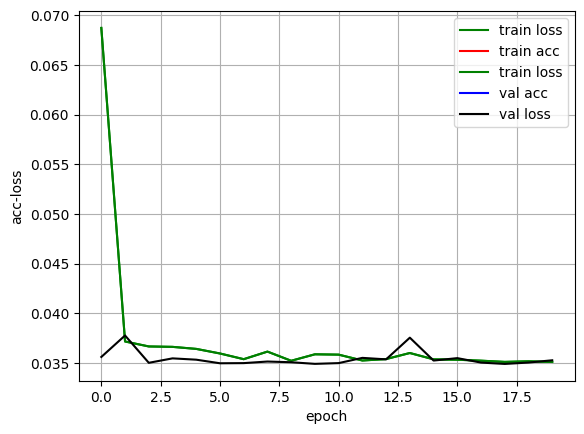

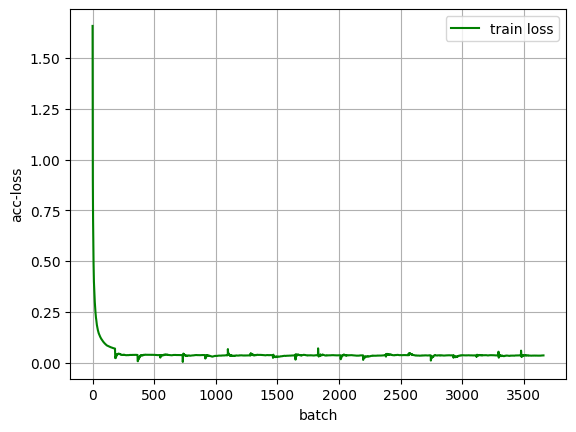

In [ ]:
#default only 50, tf36cnn 99
xception(num_class=4,epochs=20)
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

In [ ]:
def vgg16( num_class, epochs,savepath='./VGG16.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:15]:	#the number of frozen layers for transfer learning, have tuned from 5-18
        layer.trainable = False
    for layer in model_fine_tune.layers[15:]:
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output) #GlobalAveragePooling2D layer to convert the features to a single 1280-element vector per image
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='vgg')
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])	#set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_acc', patience=2, verbose=1, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='val_acc',
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        #workers=2,
        callbacks=[earlyStopping, saveBestModel, history],
    )

58889256/58889256 [==============================] - 1s 0us/step
Epoch 1/20
183/183 [==============================] - ETA: 0s - loss: 0.0824 - accuracy: 0.9738

183/183 [==============================] - 153s 801ms/step - loss: 0.0824 - accuracy: 0.9738 - val_loss: 0.0350 - val_accuracy: 0.9868
Epoch 2/20
183/183 [==============================] - ETA: 0s - loss: 0.0368 - accuracy: 0.9864

183/183 [==============================] - 146s 796ms/step - loss: 0.0368 - accuracy: 0.9864 - val_loss: 0.0359 - val_accuracy: 0.9868
Epoch 3/20
183/183 [==============================] - ETA: 0s - loss: 0.0380 - accuracy: 0.9863

183/183 [==============================] - 146s 797ms/step - loss: 0.0380 - accuracy: 0.9863 - val_loss: 0.0350 - val_accuracy: 0.9868
Epoch 4/20
183/183 [==============================] - ETA: 0s - loss: 0.0369 - accuracy: 0.9867

183/183 [==============================] - 146s 799ms/step - loss: 0.0369 - accuracy: 0.9867 - val_loss: 0.0350 - val_accuracy: 0.9868
Epoch 5/20
183/183 [==============================] - ETA: 0s - loss: 0.0494 - accuracy: 0.9845

183/183 [==============================] - 144s 788ms/step - loss: 0.0494 - accuracy: 0.9845 - val_loss: 0.0349 - val_accuracy: 0.9868
Epoch 6/20
183/183 [==============================] - ETA: 0s - loss: 0.0361 - accuracy: 0.9867

183/183 [==============================] - 146s 798ms/step - loss: 0.0361 - accuracy: 0.9867 - val_loss: 0.0344 - val_accuracy: 0.9868
Epoch 7/20
183/183 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9867

183/183 [==============================] - 146s 796ms/step - loss: 0.0354 - accuracy: 0.9867 - val_loss: 0.0344 - val_accuracy: 0.9868
Epoch 8/20
183/183 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9867

183/183 [==============================] - 144s 784ms/step - loss: 0.0358 - accuracy: 0.9867 - val_loss: 0.0346 - val_accuracy: 0.9868
Epoch 9/20
183/183 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.9867

183/183 [==============================] - 146s 798ms/step - loss: 0.0356 - accuracy: 0.9867 - val_loss: 0.0369 - val_accuracy: 0.9868
Epoch 10/20
183/183 [==============================] - ETA: 0s - loss: 0.0357 - accuracy: 0.9867

183/183 [==============================] - 146s 796ms/step - loss: 0.0357 - accuracy: 0.9867 - val_loss: 0.0345 - val_accuracy: 0.9868
Epoch 11/20
183/183 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9867

183/183 [==============================] - 144s 783ms/step - loss: 0.0358 - accuracy: 0.9867 - val_loss: 0.0345 - val_accuracy: 0.9868
Epoch 12/20
183/183 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9867

183/183 [==============================] - 146s 797ms/step - loss: 0.0358 - accuracy: 0.9867 - val_loss: 0.0349 - val_accuracy: 0.9868
Epoch 13/20
183/183 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9867

183/183 [==============================] - 146s 796ms/step - loss: 0.0354 - accuracy: 0.9867 - val_loss: 0.0344 - val_accuracy: 0.9868
Epoch 14/20
183/183 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.9867

183/183 [==============================] - 143s 783ms/step - loss: 0.0356 - accuracy: 0.9867 - val_loss: 0.0346 - val_accuracy: 0.9868
Epoch 15/20
183/183 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.9867

183/183 [==============================] - 157s 856ms/step - loss: 0.0356 - accuracy: 0.9867 - val_loss: 0.0344 - val_accuracy: 0.9868
Epoch 16/20
183/183 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9867

183/183 [==============================] - 146s 798ms/step - loss: 0.0354 - accuracy: 0.9867 - val_loss: 0.0346 - val_accuracy: 0.9868
Epoch 17/20
183/183 [==============================] - ETA: 0s - loss: 0.0455 - accuracy: 0.9861

183/183 [==============================] - 146s 798ms/step - loss: 0.0455 - accuracy: 0.9861 - val_loss: 0.0354 - val_accuracy: 0.9868
Epoch 18/20
183/183 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.9867

183/183 [==============================] - 146s 798ms/step - loss: 0.0356 - accuracy: 0.9867 - val_loss: 0.0348 - val_accuracy: 0.9868
Epoch 19/20
183/183 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9867

183/183 [==============================] - 146s 797ms/step - loss: 0.0354 - accuracy: 0.9867 - val_loss: 0.0348 - val_accuracy: 0.9868
Epoch 20/20
183/183 [==============================] - ETA: 0s - loss: 0.0355 - accuracy: 0.9867

183/183 [==============================] - 144s 785ms/step - loss: 0.0355 - accuracy: 0.9867 - val_loss: 0.0376 - val_accuracy: 0.9868


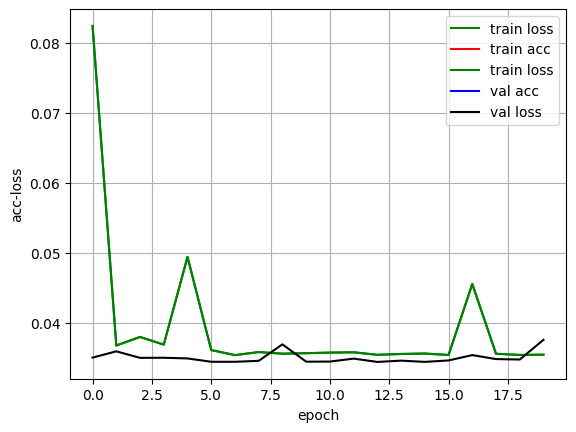

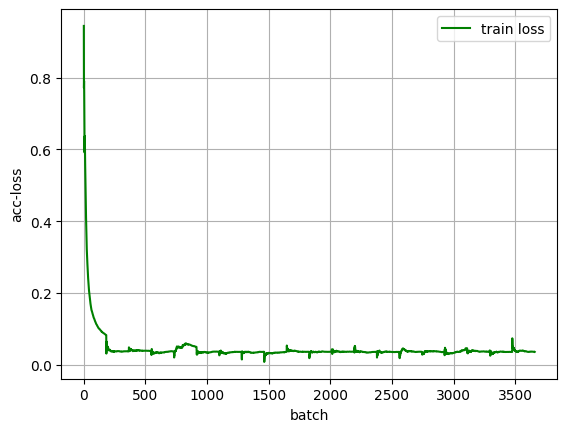

In [ ]:
vgg16(num_class=4,epochs=20)	#tf36cnn
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

In [ ]:
def vgg19( num_class, epochs,savepath='./VGG19.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:19]:	#the number of frozen layers for transfer learning, have tuned from 5-18
        layer.trainable = False
    for layer in model_fine_tune.layers[19:]:
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='vgg')
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])	#set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_acc', patience=2, verbose=1, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='val_acc',
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        #workers=2,
        callbacks=[earlyStopping, saveBestModel, history],
    )

80134624/80134624 [==============================] - 1s 0us/step
Epoch 1/20
183/183 [==============================] - ETA: 0s - loss: 0.0673 - accuracy: 0.9761

183/183 [==============================] - 161s 871ms/step - loss: 0.0673 - accuracy: 0.9761 - val_loss: 0.0368 - val_accuracy: 0.9868
Epoch 2/20
183/183 [==============================] - ETA: 0s - loss: 0.0377 - accuracy: 0.9865

183/183 [==============================] - 169s 924ms/step - loss: 0.0377 - accuracy: 0.9865 - val_loss: 0.0348 - val_accuracy: 0.9868
Epoch 3/20
183/183 [==============================] - ETA: 0s - loss: 0.0365 - accuracy: 0.9867

183/183 [==============================] - 178s 972ms/step - loss: 0.0365 - accuracy: 0.9867 - val_loss: 0.0346 - val_accuracy: 0.9868
Epoch 4/20
183/183 [==============================] - ETA: 0s - loss: 0.0363 - accuracy: 0.9866

183/183 [==============================] - 169s 925ms/step - loss: 0.0363 - accuracy: 0.9866 - val_loss: 0.0896 - val_accuracy: 0.9699
Epoch 5/20
183/183 [==============================] - ETA: 0s - loss: 0.0460 - accuracy: 0.9849

183/183 [==============================] - 169s 923ms/step - loss: 0.0460 - accuracy: 0.9849 - val_loss: 0.0346 - val_accuracy: 0.9868
Epoch 6/20
183/183 [==============================] - ETA: 0s - loss: 0.0365 - accuracy: 0.9867

183/183 [==============================] - 169s 922ms/step - loss: 0.0365 - accuracy: 0.9867 - val_loss: 0.0376 - val_accuracy: 0.9867
Epoch 7/20
183/183 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9867

183/183 [==============================] - 169s 922ms/step - loss: 0.0358 - accuracy: 0.9867 - val_loss: 0.0395 - val_accuracy: 0.9867
Epoch 8/20
183/183 [==============================] - ETA: 0s - loss: 0.0363 - accuracy: 0.9866

183/183 [==============================] - 169s 923ms/step - loss: 0.0363 - accuracy: 0.9866 - val_loss: 0.0381 - val_accuracy: 0.9853
Epoch 9/20
183/183 [==============================] - ETA: 0s - loss: 0.0363 - accuracy: 0.9864

183/183 [==============================] - 169s 922ms/step - loss: 0.0363 - accuracy: 0.9864 - val_loss: 0.0347 - val_accuracy: 0.9868
Epoch 10/20
183/183 [==============================] - ETA: 0s - loss: 0.0357 - accuracy: 0.9867

183/183 [==============================] - 169s 923ms/step - loss: 0.0357 - accuracy: 0.9867 - val_loss: 0.0353 - val_accuracy: 0.9868
Epoch 11/20
183/183 [==============================] - ETA: 0s - loss: 0.0355 - accuracy: 0.9867

183/183 [==============================] - 169s 922ms/step - loss: 0.0355 - accuracy: 0.9867 - val_loss: 0.0347 - val_accuracy: 0.9868
Epoch 12/20
183/183 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.9867

183/183 [==============================] - 169s 923ms/step - loss: 0.0356 - accuracy: 0.9867 - val_loss: 0.0348 - val_accuracy: 0.9868
Epoch 13/20
183/183 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9867

183/183 [==============================] - 169s 924ms/step - loss: 0.0352 - accuracy: 0.9867 - val_loss: 0.0357 - val_accuracy: 0.9868
Epoch 14/20
183/183 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9867

183/183 [==============================] - 170s 927ms/step - loss: 0.0354 - accuracy: 0.9867 - val_loss: 0.0363 - val_accuracy: 0.9868
Epoch 15/20
183/183 [==============================] - ETA: 0s - loss: 0.0353 - accuracy: 0.9867

183/183 [==============================] - 169s 924ms/step - loss: 0.0353 - accuracy: 0.9867 - val_loss: 0.0351 - val_accuracy: 0.9868
Epoch 16/20
183/183 [==============================] - ETA: 0s - loss: 0.0349 - accuracy: 0.9867

183/183 [==============================] - 169s 923ms/step - loss: 0.0349 - accuracy: 0.9867 - val_loss: 0.0347 - val_accuracy: 0.9868
Epoch 17/20
183/183 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9867

183/183 [==============================] - 169s 926ms/step - loss: 0.0352 - accuracy: 0.9867 - val_loss: 0.0346 - val_accuracy: 0.9868
Epoch 18/20
183/183 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9867

183/183 [==============================] - 169s 925ms/step - loss: 0.0354 - accuracy: 0.9867 - val_loss: 0.0355 - val_accuracy: 0.9867
Epoch 19/20
183/183 [==============================] - ETA: 0s - loss: 0.0359 - accuracy: 0.9867

183/183 [==============================] - 169s 925ms/step - loss: 0.0359 - accuracy: 0.9867 - val_loss: 0.0351 - val_accuracy: 0.9867
Epoch 20/20
183/183 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9867

183/183 [==============================] - 169s 922ms/step - loss: 0.0352 - accuracy: 0.9867 - val_loss: 0.0352 - val_accuracy: 0.9868


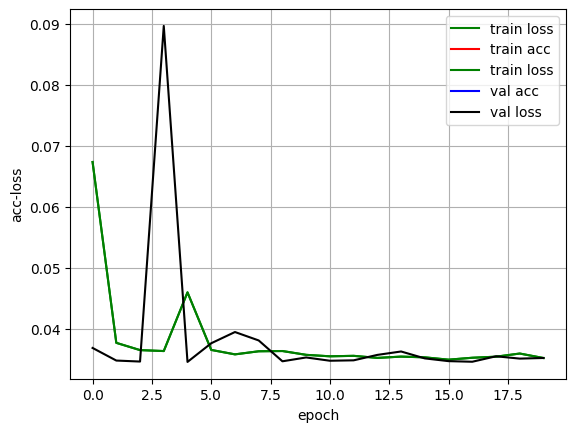

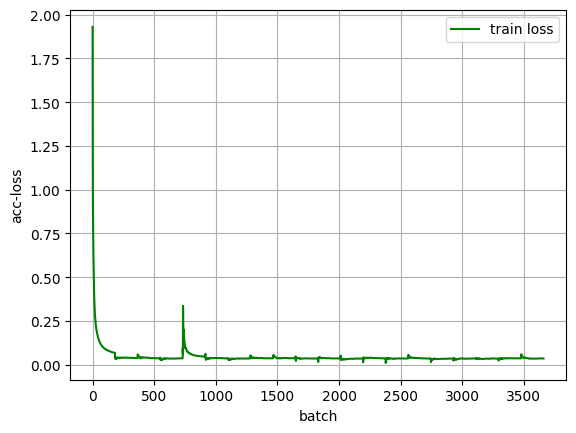

In [ ]:
vgg19(num_class=4,epochs=20)	#binary classificaiton
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

In [ ]:
def resnet( num_class, epochs,savepath='./resnet.h5',history=history_this,input_shape=INPUT_SIZE):
    model_fine_tune = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    for layer in model_fine_tune.layers[:120]:	#the number of frozen layers for transfer learning, have tuned from 50-150
        layer.trainable = False
    for layer in model_fine_tune.layers[120:]:	#the number of trainable layers for transfer learning
        layer.trainable = True
    model = GlobalAveragePooling2D()(model_fine_tune.output)
    model=Dense(units=256,activation='relu')(model)
    model=Dropout(0.5)(model)
    model = Dense(num_class, activation='softmax')(model)
    model = Model(model_fine_tune.input, model, name='resnet')
    opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)	#tuned learning rate to be 0.001
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) #set the loss function to be binary crossentropy
    #train model
    earlyStopping = kcallbacks.EarlyStopping(
        monitor='val_acc', patience=2, verbose=1, mode='auto')	#set early stop patience to save training time
    saveBestModel = kcallbacks.ModelCheckpoint(
        filepath=savepath,
        monitor='val_acc',
        verbose=1,
        save_best_only=True,
        mode='auto')
    hist = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        #use_multiprocessing=True,
        callbacks=[earlyStopping, saveBestModel, history],
    )

In [ ]:
resnet(num_class=4,epochs=20)	#binary classificaiton
history_this.loss_plot('epoch')
history_this.loss_plot('batch')
plt.show()

94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/20
 13/183 [=>............................] - ETA: 2:23:17 - loss: 0.9160 - accuracy: 0.7746